# Make T-S diagram

## Importation of modules

In [1]:
import gsw
import pandas
import numpy as np
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Close all pyplot windows

In [2]:
plt.close("all")

## Function

In [3]:
def density_contour(ax, sgrid, tgrid):
    """
    Plot of density contour.
    :param ax:
    :param sgrid:
    :param tgrid:
    :return:
    """
    dens = gsw.sigma0(*np.meshgrid(sgrid, tgrid))
    c_dens = ax.contour(sgrid, tgrid, dens, levels=np.arange(22, 29, 1), linestyles='dashed', colors='gray', linewidths=.8)
    ax.clabel(c_dens, inline=True, fmt="%1.1f $\mathrm{kg\ m^{-3}}$", fontsize=10)

## T-S diagram

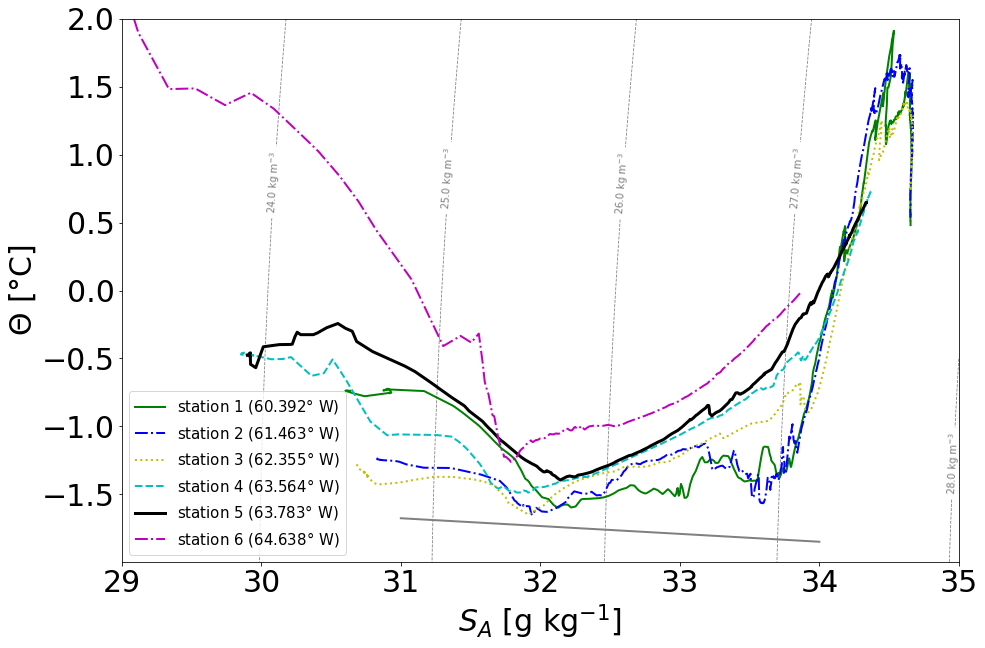

In [4]:
# Open data
path = "1802_ODV_truncated.csv"
data = pandas.read_csv(path, header=[0], sep=',')
data = data.set_index("Station")  # Set index of dataframe to station number

# Dictionary for station number
station_dic = {"station 1": 7,
                "station 2": 9,
                "station 3": 10,
                "station 4": 12,
                "station 5": 11,
                "station 6": 13}

with plt.style.context('ts_diagram.mplstyle'):
    fig2 = plt.figure(figsize=(15,10))  # T-S diagram
    ax2 = fig2.add_subplot(111)

    # Colormap for depth
    colmap = cm.get_cmap("hot")
    normalization = matplotlib.colors.Normalize(vmin=0.0, vmax=1100.0)

    # Color each station
    cl = {"station 1": "g",
          "station 2": "b",
          "station 3": "y",
          "station 4": "c",
          "station 5": "k",
          "station 6": "m"}

    # Linestyle each station
    lstyle = {"station 1": "-",
              "station 2": "-.",
              "station 3": ":",
              "station 4": "--",
              "station 5": "-",
              "station 6": "-."}

    # Density lines
    sgrid = np.linspace(29, 35, 100)
    tgrid = np.linspace(-2, 2, 100)

    # Freeze curve
    Sf = np.linspace(31, 34, 10)
    Tf = gsw.CT_freezing(Sf, 0, 0)

    density_contour(ax2, sgrid, tgrid)

    # Freezing curve
    ax2.plot(Sf, Tf, "-", color="gray", linewidth=2)

    # Loop
    for key in station_dic.keys():

        station_data = data.loc[station_dic[key]]

        # Longitude, latitude
        lon = station_data['Longitude [degrees_east]'].iloc[0]
        lat = station_data['Latitude [degrees_north]'].iloc[0]

        # Depth and normalization
        depth = np.array(station_data["Depth [metres]"]).astype(list)
        color_depth = [colmap(normalization(value)) for value in list(depth)]

        # Salinity, conservative temperature data
        salinity = np.array(station_data["Asal [g/kg]"]).astype(float)
        cons_temp = np.array(station_data["Cont [deg C]"]).astype(float)

        # Label
        lab = "{0} ({1:.3f}$\degree$ W)".format(key, -1*lon)

        # Plot data
        if key == "station 5":
            ax2.plot(salinity, cons_temp, linewidth=3, color=cl[key], linestyle=lstyle[key], label=lab)
        else:
            ax2.plot(salinity, cons_temp, linewidth=2, color=cl[key], linestyle=lstyle[key], label=lab)

    # Figures
    # Fig2 - TS diagram
    ax2.set_xlim(29, 35)
    ax2.set_ylim(-2, 2)
    ax2.set_yticks(np.arange(-1.5,2.5,0.5))

    ax2.set_ylabel("$\Theta$ [$\degree$C]")
    ax2.set_xlabel("$S_{A}$ [$\mathrm{g\ kg^{-1}}$]")

    ax2.legend(loc="best")

    fig2.savefig(f'ts-diagram.png')

    plt.show()